In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [3]:
df = pd.read_csv('/content/segmentation data.csv')
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [4]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
 df.shape

(2000, 8)

In [8]:
df.drop(['ID'], inplace = True, axis = 1)

In [9]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


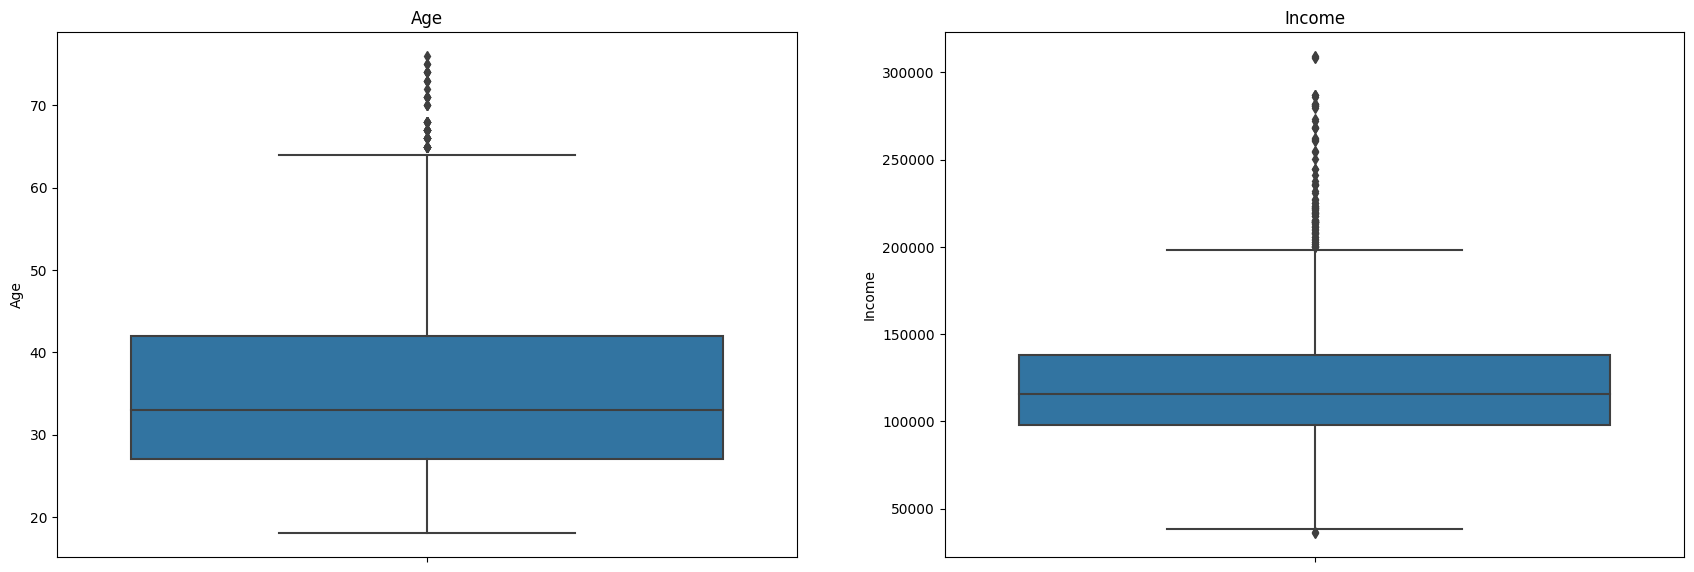

In [11]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Income)
plt.title("Income")

plt.show()

In [12]:
df.Age.describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [13]:
df.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

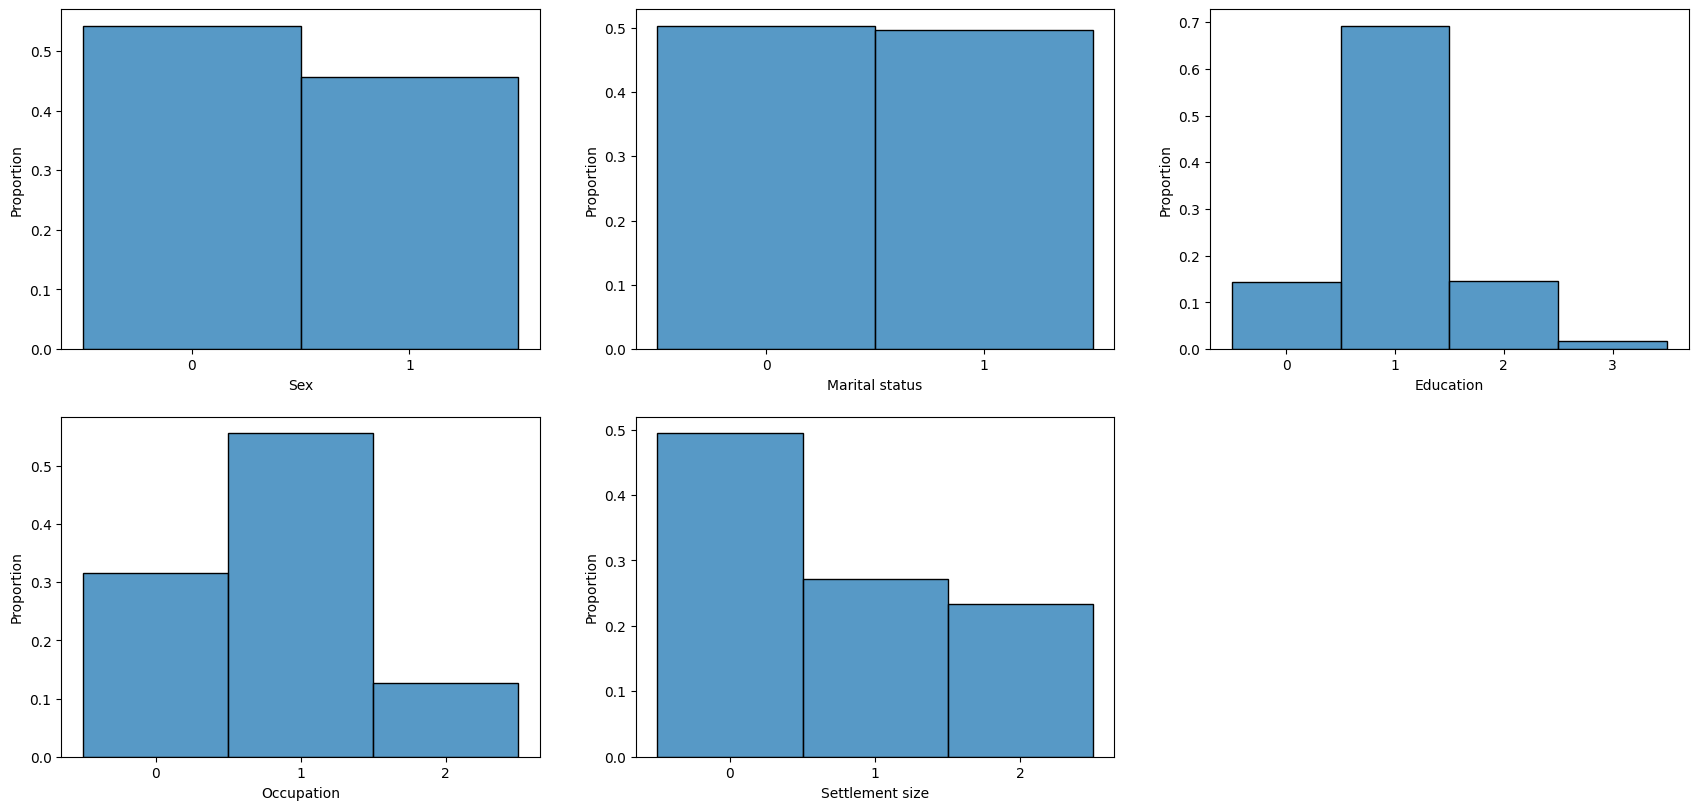

In [14]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(df.Sex.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(df['Marital status'].astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(df.Education.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(df.Occupation.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,1))
sns.histplot(df['Settlement size'].astype(str).sort_values(), stat='proportion')

plt.show()

In [16]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [17]:
data=scaled[['Age','Income']]
data.head()

,Age,Income
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


In [18]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,4000.000000,1
1,2260.203473,2
2,1647.539023,3
3,1281.144689,4
4,1024.223911,5
5,865.982269,6
6,751.054135,7
7,666.427051,8
8,583.096558,9
9,511.253658,10


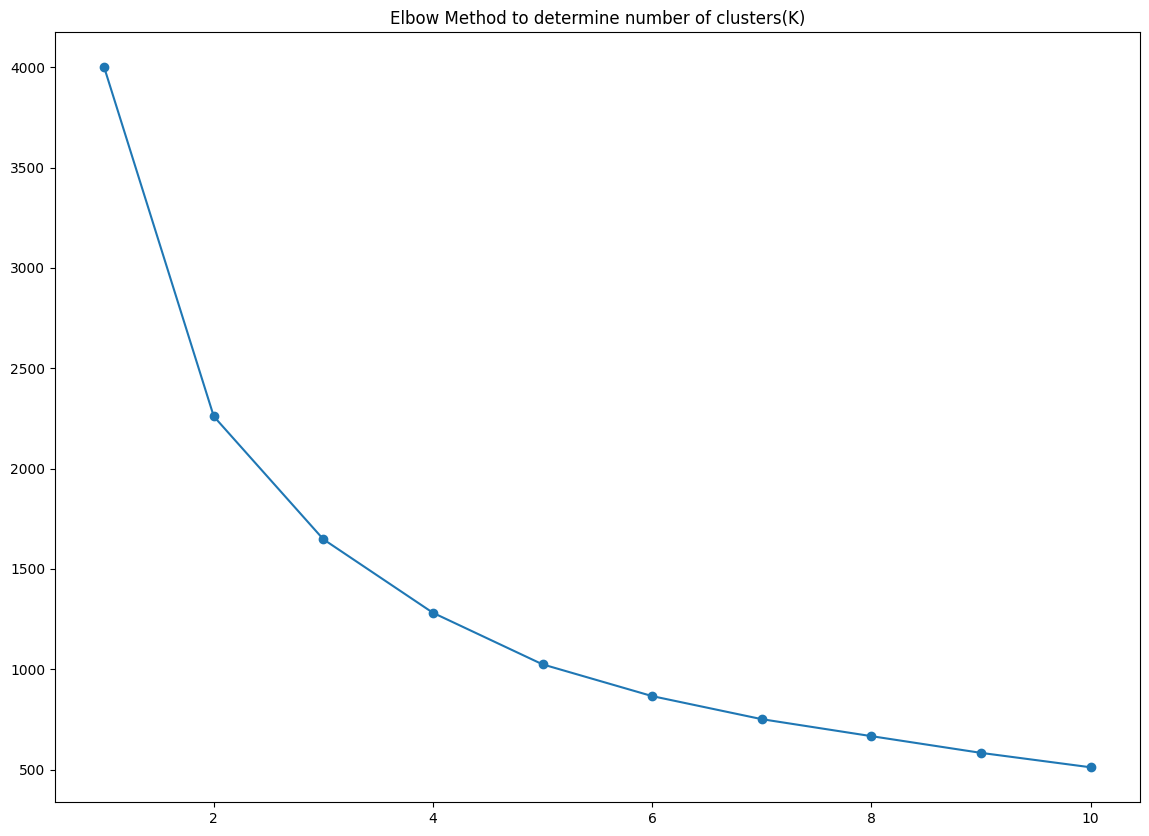

In [19]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

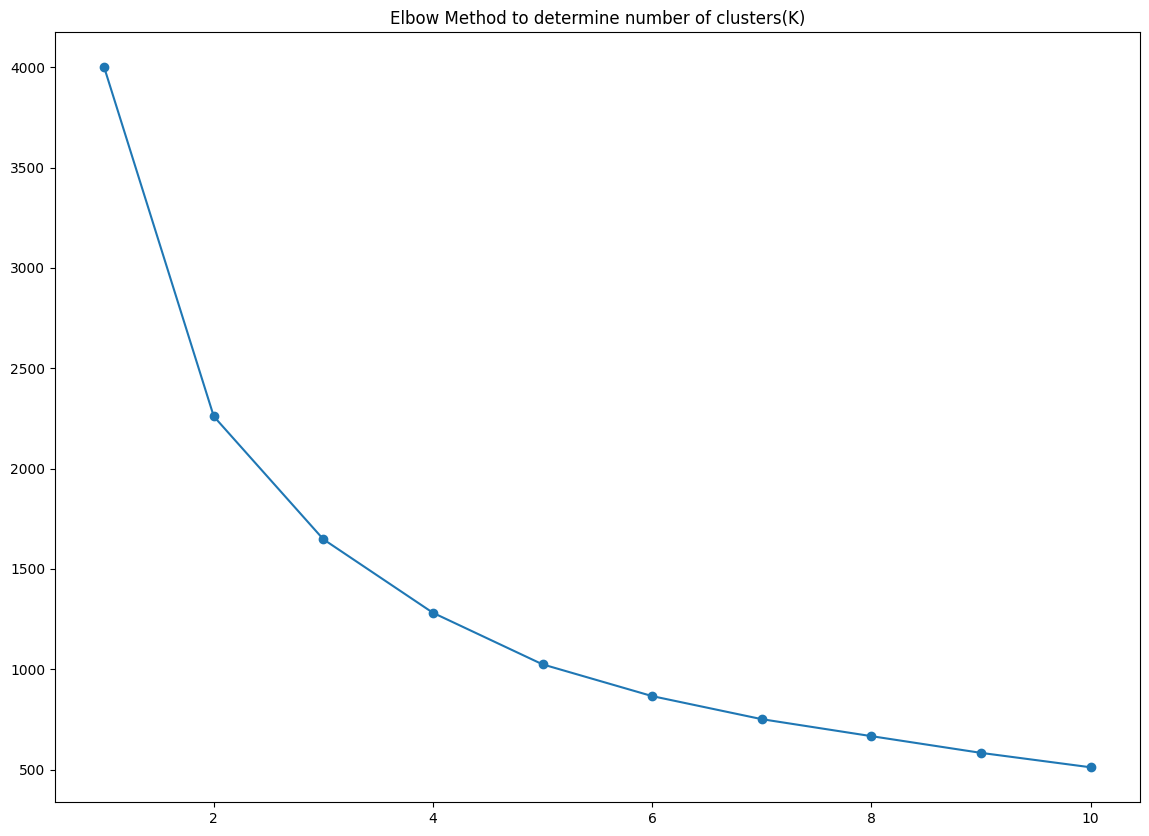

In [20]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [22]:
prediction=kmeans.fit_predict(data)
prediction

clustered_data = df.copy()
clustered_data["cluster_index"] = prediction

In [23]:
clustered_data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_index
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,2
1996,1,1,27,1,117744,1,0,1
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,1


<Axes: xlabel='Age', ylabel='Income'>

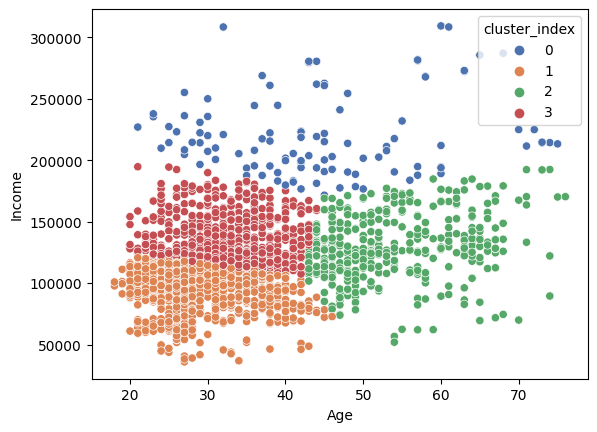

In [24]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [25]:
score = silhouette_score(df, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.238 ~ 0


In [26]:
def s_score(distance, linkage):
    agc = AgglomerativeClustering(n_clusters=4, affinity=distance, linkage=linkage)
    agc.fit_predict(scaled)
    score = silhouette_score(scaled, agc.labels_, random_state=0)
    return score

In [27]:
distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']

In [28]:
scoring = {'dist':[], 'link':[], 'sScore':[]}
for i in distances:
    for j in linkages:
        try:
            score = s_score(i, j)
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(score)
        except:
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(np.nan)
scoringDf = pd.DataFrame(scoring)

In [29]:
scoringDf.dropna(axis=0, inplace=True)

In [30]:
final_result = scoringDf[scoringDf['sScore'] == max(scoringDf['sScore'])]
final_result

,dist,link,sScore
18,cosine,average,0.259621


In [31]:
final_result = scoringDf[scoringDf['sScore'] == max(scoringDf['sScore'])]
final_result

,dist,link,sScore
18,cosine,average,0.259621
